### DATA ACQUISITION

DATASET 1: https://www.kaggle.com/datasets/dansbecker/hospital-readmissions/


DATASET 2: https://www.kaggle.com/datasets/brandao/diabetes

In [ ]:
import pandas as pd

# CLEANING, PREPROCESSING AND CONCATENATING DATASETS

The two datasets represented similar information but in a quite different structure. I had to ensure
consistency across both datasets before concatenation. Dataset 1 presented almost all information if
a binary TRUE or FALSE fashion. TRUE in most cases meant that something was NOT present.


Several columns were merged together to match the structure of Dataset 2. Common columns were
kept while others had to be carefully renamed before concatenation since they conveyed the same kind
of information. Information that did not exist in both datasets was discarded.


All kinds of treatments in dataset 1 were coded in TRUE or FALSE while dataset 2 often included
other categories. TRUE meant that something was not present so it was coded to 0 and FALSE to 1.
For dataset 2 the case was the opposite and ’Yes’ was coded to 1 while ’No’ to 0.


The case was similar for the target variable which for dataset 2 had 3 categories, ’no’, within 30 days
and after 30 days. These were coded to 0 and 1 (0 for ’no’ and 1 for all others).

In [ ]:
df = pd.read_csv('train.csv')
df = df.loc[:, ~df.columns.str.startswith('diag')]

payer_code_cols = ['payer_code_?', 'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC']
df['payer_code'] = df[payer_code_cols].idxmax(axis=1).str.split('_').str[-1]

race_cols = ['race_Caucasian', 'race_AfricanAmerican']
df['race'] = df[race_cols].idxmax(axis=1).str.split('_').str[-1]

df['gender'] = df['gender_Female'].apply(lambda x: 'Female' if x else 'Male')
df.drop(columns=['gender_Female'], inplace=True)

age_cols = ['age_[70-80)', 'age_[60-70)', 'age_[50-60)', 'age_[80-90)', 'age_[40-50)']
df['age'] = df[age_cols].idxmax(axis=1).str.split('_').str[-1]

medical_specialty_cols = ['medical_specialty_?', 'medical_specialty_InternalMedicine',
                          'medical_specialty_Emergency/Trauma', 'medical_specialty_Family/GeneralPractice',
                          'medical_specialty_Cardiology']
df['medical_specialty'] = df[medical_specialty_cols].idxmax(axis=1).str.split('_').str[-1]

df.head()


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted,payer_code,race,gender,age,medical_specialty
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,0,SP,Caucasian,Male,[50-60),?
1,2,30,0,12,0,0,1,9,True,False,...,True,True,False,True,1,SP,Caucasian,Female,[50-60),?
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,1,MC,Caucasian,Female,[80-90),?
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,1,?,Caucasian,Female,[50-60),?
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,False,0,?,Caucasian,Female,[80-90),Family/GeneralPractice


In [ ]:
df.to_csv('transformed_data.csv', index=False)

In [ ]:
transformed_df = pd.read_csv('transformed_data.csv')

columns_to_drop = ['payer_code_?', 'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
                   'race_Caucasian', 'race_AfricanAmerican',
                   'age_[70-80)', 'age_[60-70)', 'age_[50-60)', 'age_[80-90)', 'age_[40-50)',
                   'medical_specialty_?', 'medical_specialty_InternalMedicine', 'medical_specialty_Emergency/Trauma',
                   'medical_specialty_Family/GeneralPractice', 'medical_specialty_Cardiology']


transformed_df.drop(columns=columns_to_drop, inplace=True)
transformed_df = transformed_df.applymap(lambda x: 1 if x is False else (0 if x is True else x))
transformed_df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum_None,A1Cresult_None,...,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted,payer_code,race,gender,age,medical_specialty
0,14,41,0,11,0,0,0,6,0,0,...,0,0,0,0,0,SP,Caucasian,Male,[50-60),?
1,2,30,0,12,0,0,1,9,0,0,...,0,0,1,0,1,SP,Caucasian,Female,[50-60),?
2,5,66,0,22,1,0,2,9,0,1,...,0,0,0,0,1,MC,Caucasian,Female,[80-90),?
3,3,63,0,8,0,0,0,8,0,0,...,0,0,0,0,1,?,Caucasian,Female,[50-60),?
4,5,40,0,6,0,0,1,9,0,0,...,0,0,0,1,0,?,Caucasian,Female,[80-90),Family/GeneralPractice


In [ ]:
columns_to_simplify = [
    "max_glu_serum_None", "A1Cresult_None", "metformin_No", "repaglinide_No", "nateglinide_No",
    "chlorpropamide_No", "glimepiride_No", "acetohexamide_No", "glipizide_No", "glyburide_No",
    "tolbutamide_No", "pioglitazone_No", "rosiglitazone_No", "acarbose_No", "miglitol_No",
    "troglitazone_No", "tolazamide_No", "examide_No", "citoglipton_No", "insulin_No",
    "glyburide-metformin_No", "glipizide-metformin_No", "glimepiride-pioglitazone_No",
    "metformin-rosiglitazone_No", "metformin-pioglitazone_No", "change_No", "diabetesMed_Yes"
]
simplified_columns = {col: col.rsplit('_', 1)[0] for col in columns_to_simplify}

transformed_df.rename(columns=simplified_columns, inplace=True)

transformed_df.head()


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,payer_code,race,gender,age,medical_specialty
0,14,41,0,11,0,0,0,6,0,0,...,0,0,0,0,0,SP,Caucasian,Male,[50-60),?
1,2,30,0,12,0,0,1,9,0,0,...,0,0,1,0,1,SP,Caucasian,Female,[50-60),?
2,5,66,0,22,1,0,2,9,0,1,...,0,0,0,0,1,MC,Caucasian,Female,[80-90),?
3,3,63,0,8,0,0,0,8,0,0,...,0,0,0,0,1,?,Caucasian,Female,[50-60),?
4,5,40,0,6,0,0,1,9,0,0,...,0,0,0,1,0,?,Caucasian,Female,[80-90),Family/GeneralPractice


In [ ]:
#SAVE TO CSV
transformed_df.to_csv('cleaned_data.csv', index=False)

In [ ]:
diabetic_data = pd.read_csv('diabetic_data.csv')

In [ ]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df1 = pd.read_csv('cleaned_data.csv')
df2 = diabetic_data


In [ ]:
common_columns = df1.columns.intersection(df2.columns)
print(common_columns)

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'payer_code', 'race', 'gender', 'age', 'medical_specialty'],
      dtype='object')


In [ ]:
not_common_columns = df1.columns.difference(df2.columns)
print(not_common_columns)

Index([], dtype='object')


In [ ]:
not_common_columns = df2.columns.difference(df1.columns)
print(not_common_columns)

Index(['admission_source_id', 'admission_type_id', 'diag_1', 'diag_2',
       'diag_3', 'discharge_disposition_id', 'encounter_id', 'patient_nbr',
       'weight'],
      dtype='object')


In [ ]:
df2.drop(columns=not_common_columns, inplace=True)

In [ ]:
df1= df1.astype(str)
df2 = df2.astype(str)

In [ ]:
common_rows = df1.merge(df2, how='inner')
print(common_rows.shape[0])


0


In [ ]:
df1

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,payer_code,race,gender,age,medical_specialty
0,14,41,0,11,0,0,0,6,0,0,...,0,0,0,0,0,SP,Caucasian,Male,[50-60),?
1,2,30,0,12,0,0,1,9,0,0,...,0,0,1,0,1,SP,Caucasian,Female,[50-60),?
2,5,66,0,22,1,0,2,9,0,1,...,0,0,0,0,1,MC,Caucasian,Female,[80-90),?
3,3,63,0,8,0,0,0,8,0,0,...,0,0,0,0,1,?,Caucasian,Female,[50-60),?
4,5,40,0,6,0,0,1,9,0,0,...,0,0,0,1,0,?,Caucasian,Female,[80-90),Family/GeneralPractice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2,85,0,12,0,0,0,9,0,0,...,0,0,1,0,0,SP,Caucasian,Male,[60-70),?
24996,5,35,2,15,0,0,0,9,0,0,...,0,0,0,0,1,?,AfricanAmerican,Female,[60-70),Cardiology
24997,3,10,1,23,1,0,0,4,0,0,...,0,0,1,0,1,MC,Caucasian,Male,[70-80),?
24998,8,69,3,41,1,0,0,9,0,0,...,0,0,1,0,1,HM,Caucasian,Male,[60-70),?


In [ ]:
df2

,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,?,Pediatrics-Endocrinology,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,?,?,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,?,?,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,?,?,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,?,?,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,MC,?,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),5,MC,?,33,3,18,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,MC,?,53,0,9,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),10,MC,Surgery-General,45,2,21,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df2['metformin'].value_counts()

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [ ]:
binary_columns = [
    "max_glu_serum", "A1Cresult", "metformin", "repaglinide", "nateglinide",
    "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide",
    "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol",
    "troglitazone", "tolazamide", "examide", "citoglipton", "insulin",
    "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone",
    "metformin-rosiglitazone", "metformin-pioglitazone", "change", "diabetesMed"
]

for col in binary_columns:
    df2[col] = df2[col].apply(lambda x: 0 if x == 'No' else 1)


df2['readmitted'] = df2['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

df2['gender'] = df2['gender'].apply(lambda x: 1 if x == 'Female' else 0)
df1['gender'] = df1['gender'].apply(lambda x: 1 if x == 'Female' else 0)


In [ ]:
df1.to_csv('df1.csv', index=False)
df2.to_csv('df2.csv', index=False)

In [ ]:
common_columns = df1.columns.intersection(df2.columns).tolist()

common_columns

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'payer_code',
 'race',
 'gender',
 'age',
 'medical_specialty']

In [ ]:
not_common_columns = df1.columns.difference(df2.columns).tolist()
not_common_columns

[]

In [ ]:

print(df1.dtypes)
print(df2.dtypes)

time_in_hospital            object
num_lab_procedures          object
num_procedures              object
num_medications             object
number_outpatient           object
number_emergency            object
number_inpatient            object
number_diagnoses            object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide                     object
citoglipton                 object
insulin                     object
glyburide-metformin 

In [ ]:
df1 = df1.astype(str)
df2 = df2.astype(str)

In [ ]:
integer_columns = [
    "time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications",
    "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"
]


for col in integer_columns:
    df1[col] = df1[col].astype(int)
    df2[col] = df2[col].astype(int)


string_columns = [col for col in df1.columns if col not in integer_columns]

for col in string_columns:
    df1[col] = df1[col].astype(str)
    df2[col] = df2[col].astype(str)

In [ ]:
print(df1.dtypes)
print('SECOND DATASET')
print(df2.dtypes)

time_in_hospital             int32
num_lab_procedures           int32
num_procedures               int32
num_medications              int32
number_outpatient            int32
number_emergency             int32
number_inpatient             int32
number_diagnoses             int32
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide                     object
citoglipton                 object
insulin                     object
glyburide-metformin 

In [ ]:
df1 = df1[df2.columns]

In [ ]:
print(df1.dtypes)

race                        object
gender                      object
age                         object
time_in_hospital             int32
payer_code                  object
medical_specialty           object
num_lab_procedures           int32
num_procedures               int32
num_medications              int32
number_outpatient            int32
number_emergency             int32
number_inpatient             int32
number_diagnoses             int32
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone        

In [ ]:
df1.to_csv('df1.csv', index=False)
df2.to_csv('df2.csv', index=False)

In [ ]:
concatenated_df = pd.concat([df1, df2], ignore_index=True)

concatenated_df.head()

,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,0,[50-60),14,SP,?,41,0,11,0,...,0,0,0,0,0,0,0,0,0,0
1,Caucasian,1,[50-60),2,SP,?,30,0,12,0,...,0,1,0,0,0,0,0,1,0,1
2,Caucasian,1,[80-90),5,MC,?,66,0,22,1,...,0,0,0,0,0,0,0,0,0,1
3,Caucasian,1,[50-60),3,?,?,63,0,8,0,...,0,0,0,0,0,0,0,0,0,1
4,Caucasian,1,[80-90),5,?,Family/GeneralPractice,40,0,6,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
print(concatenated_df.shape)

(126766, 41)


In [ ]:
df2.shape, df1.shape

((101766, 41), (25000, 41))

In [ ]:
concatenated_df.to_csv('concatenated_data.csv', index=False)

In [ ]:
#PRINT number of duplicated rows
print(concatenated_df.duplicated().sum())

7


In [ ]:

import pandas as pd
concatenated_df = pd.read_csv('concatenated_data.csv')

# START OF EXPLORATORY ANALYSIS

In [ ]:
df = concatenated_df

In [ ]:
df['age'] = pd.Categorical(df['age'], ordered=True)
df['race'] = pd.Categorical(df['race'], ordered=False)
df['gender'] = pd.Categorical(df['gender'], ordered=False)
df['medical_specialty'] = pd.Categorical(df['medical_specialty'], ordered=False)
df['payer_code'] = pd.Categorical(df['payer_code'], ordered=False)
df['readmitted'] = pd.Categorical(df['readmitted'], ordered=False)

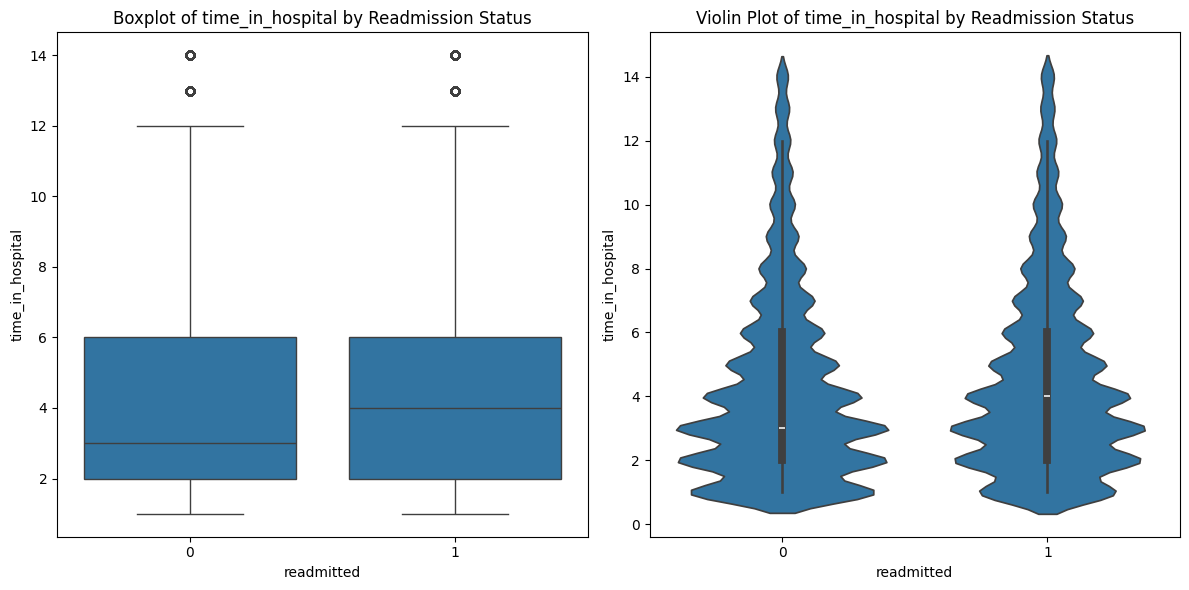

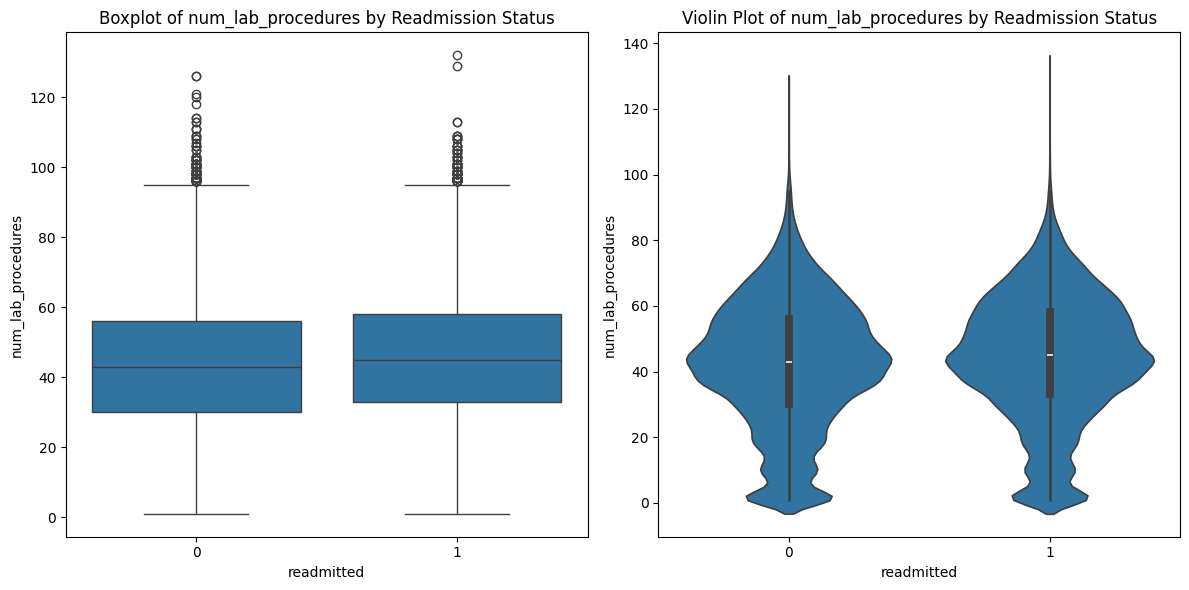

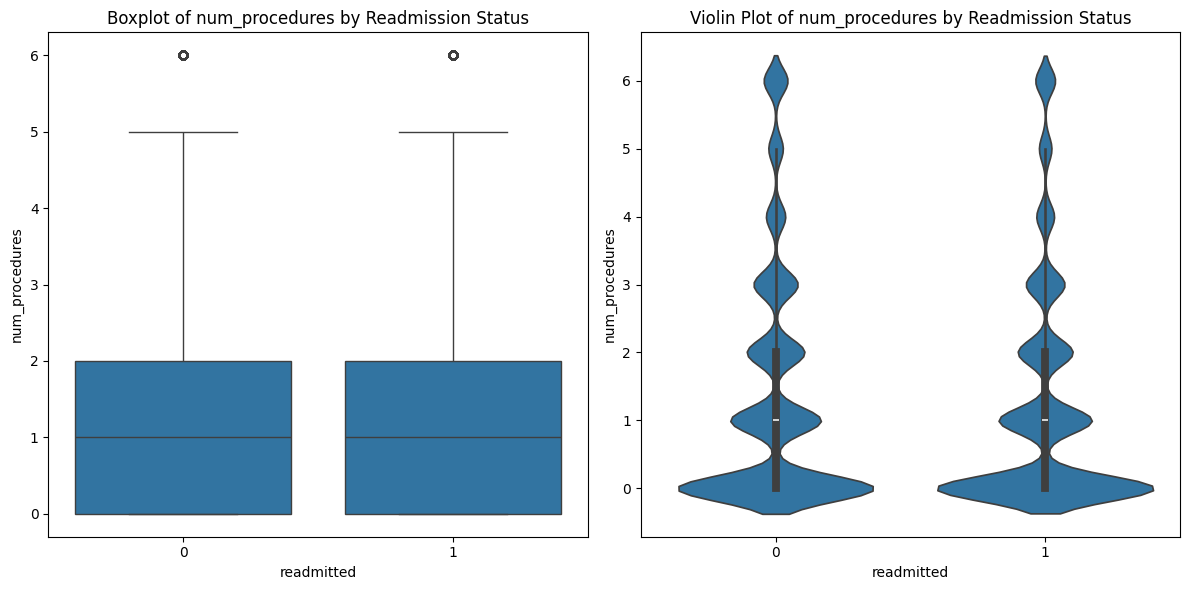

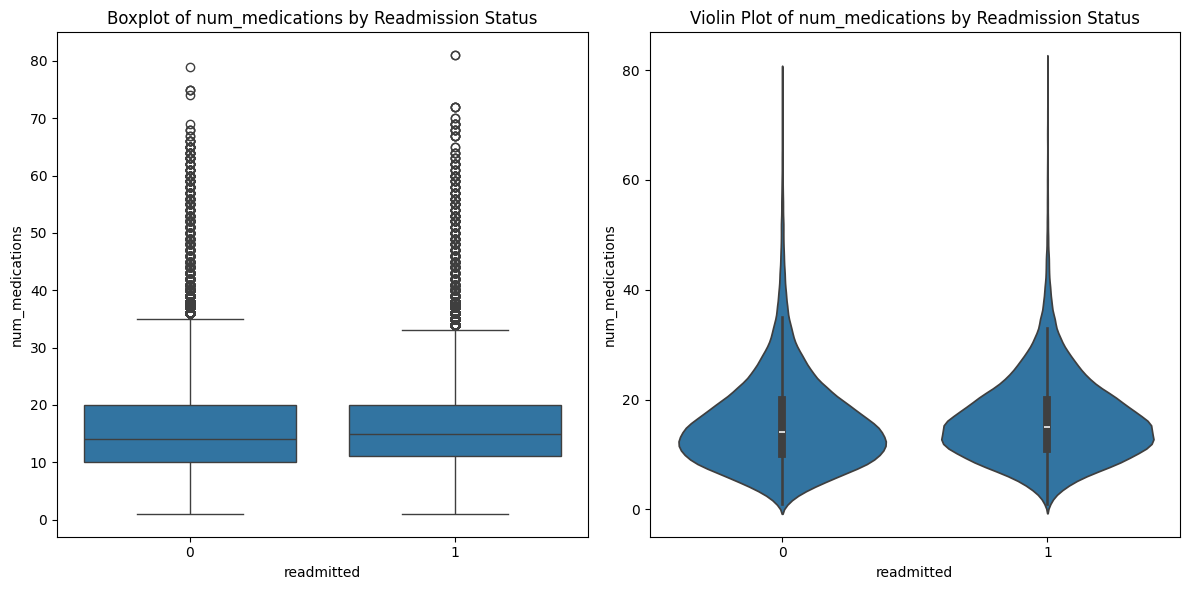

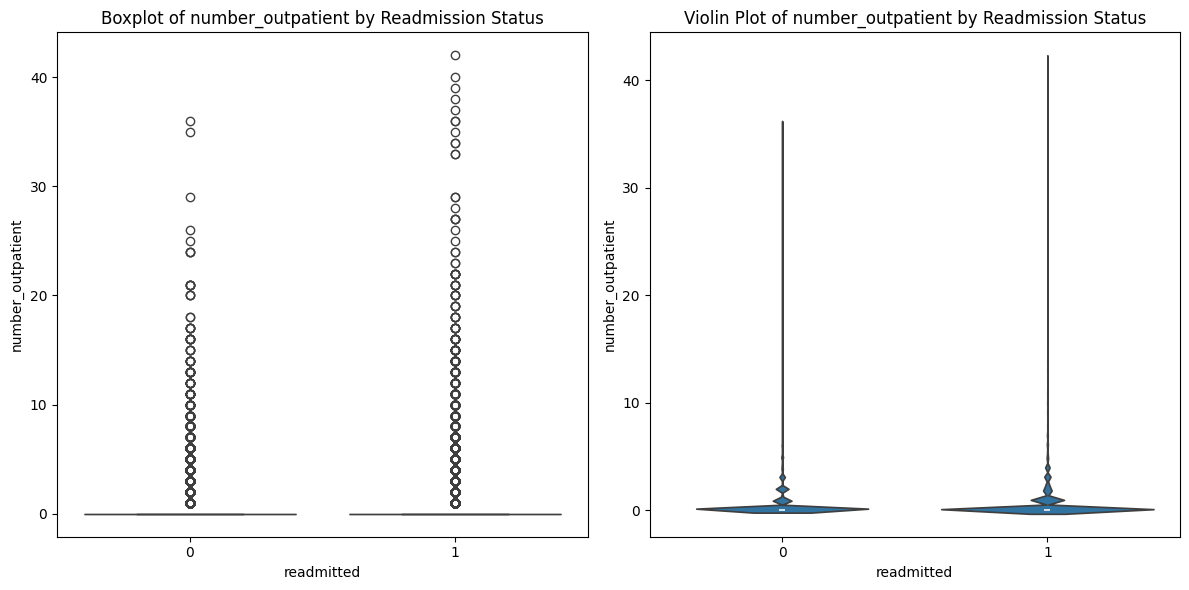

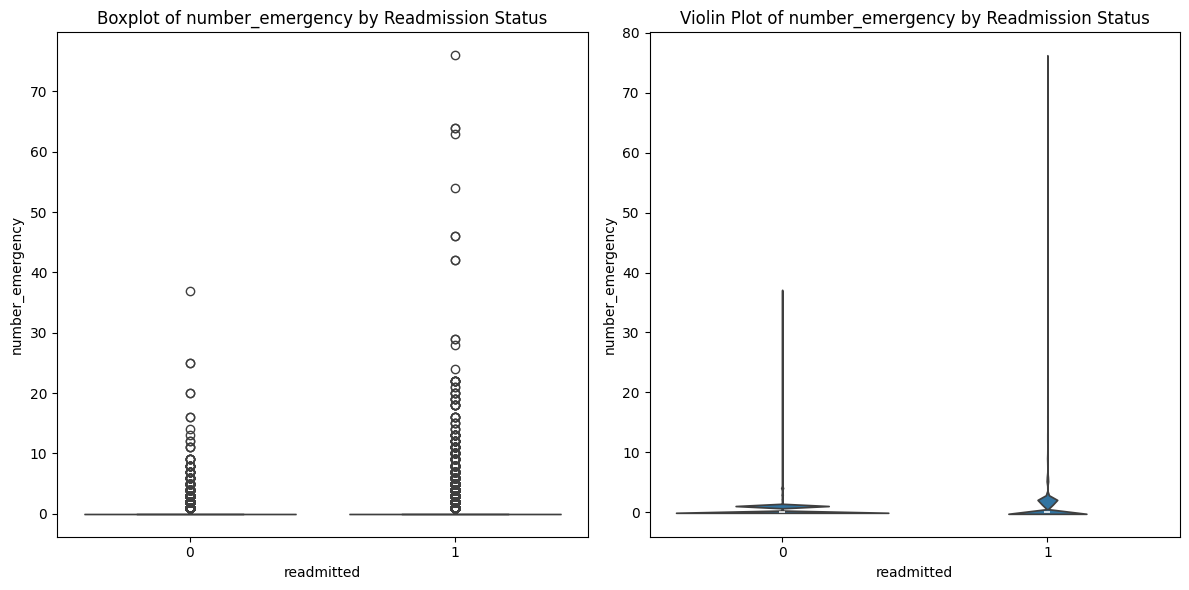

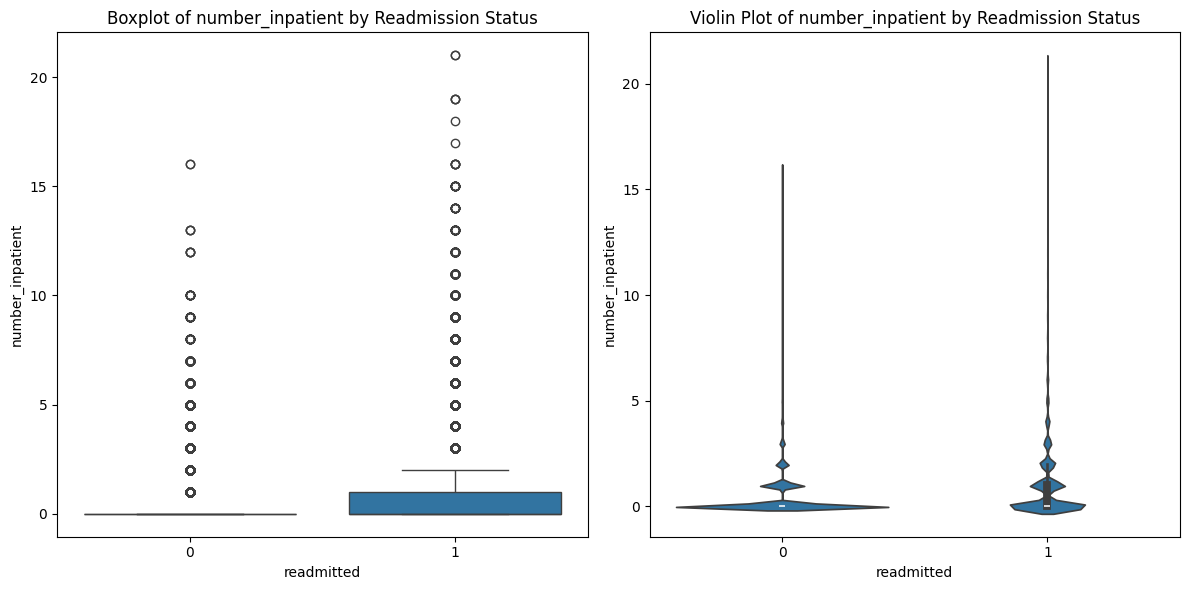

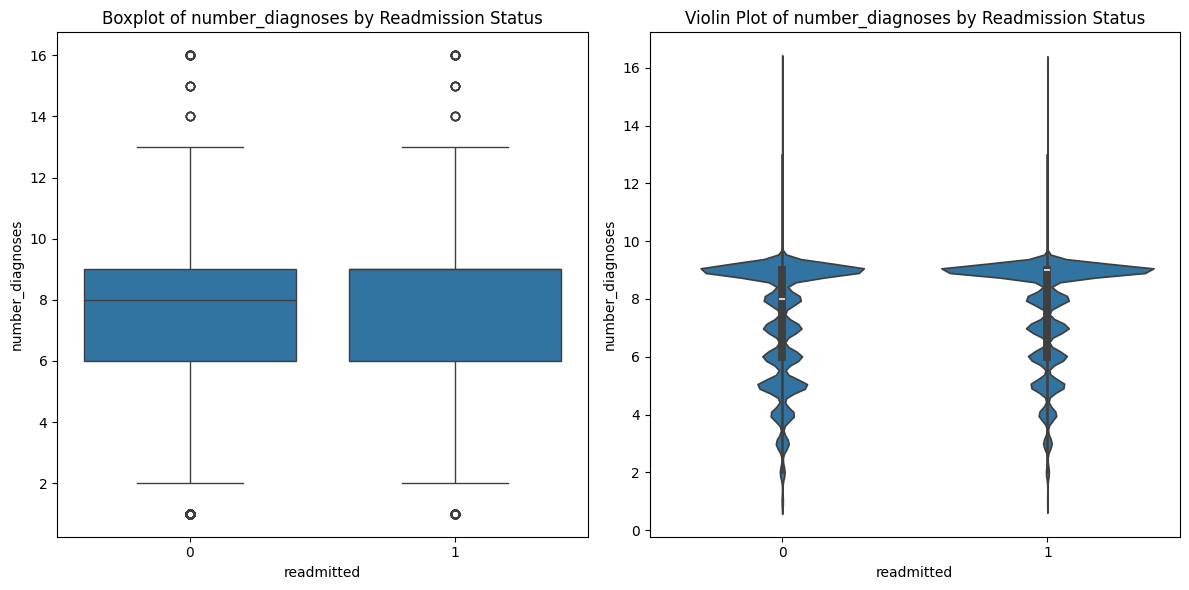

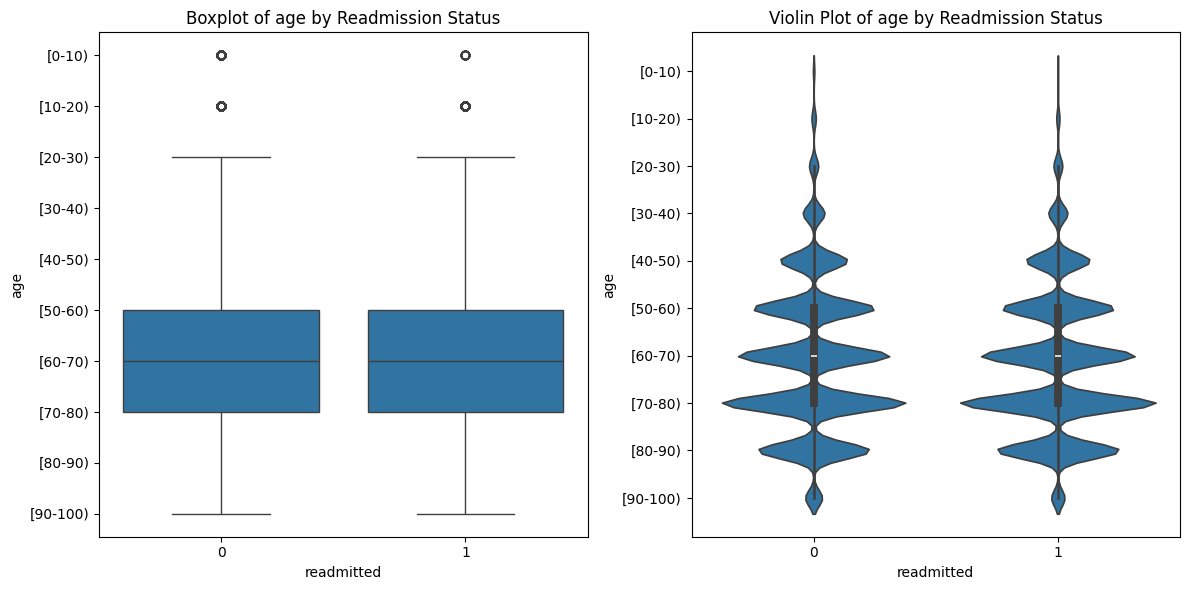

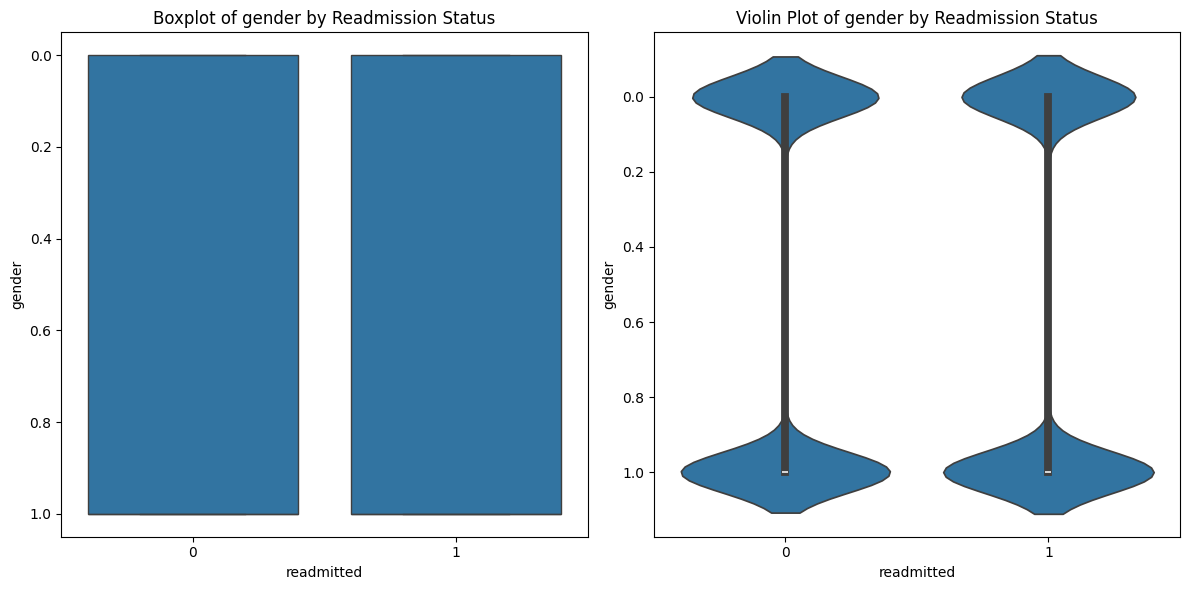

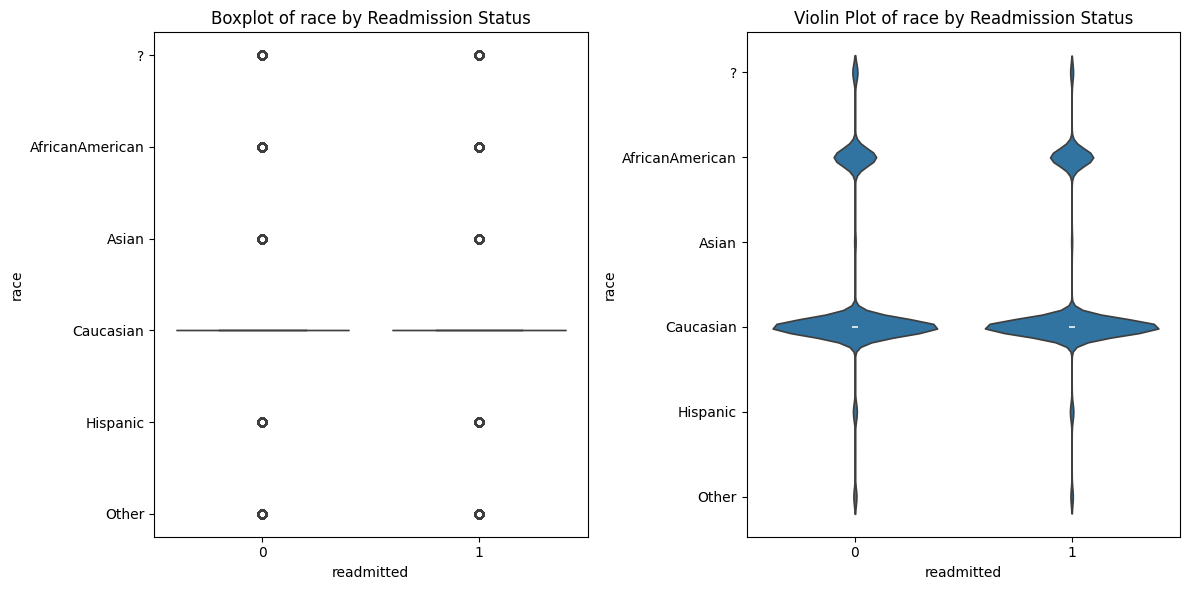

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_vars = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                  'num_medications', 'number_outpatient', 'number_emergency',
                  'number_inpatient', 'number_diagnoses', 'age', 'gender', 'race']

for var in numerical_vars:
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    sns.boxplot(x='readmitted', y=var, data=df)
    plt.title(f'Boxplot of {var} by Readmission Status')

    plt.subplot(1, 2, 2)
    sns.violinplot(x='readmitted', y=var, data=df)
    plt.title(f'Violin Plot of {var} by Readmission Status')

    plt.tight_layout()
    plt.show()


Text(0.5, 1.0, 'Count of Readmitted Patients')

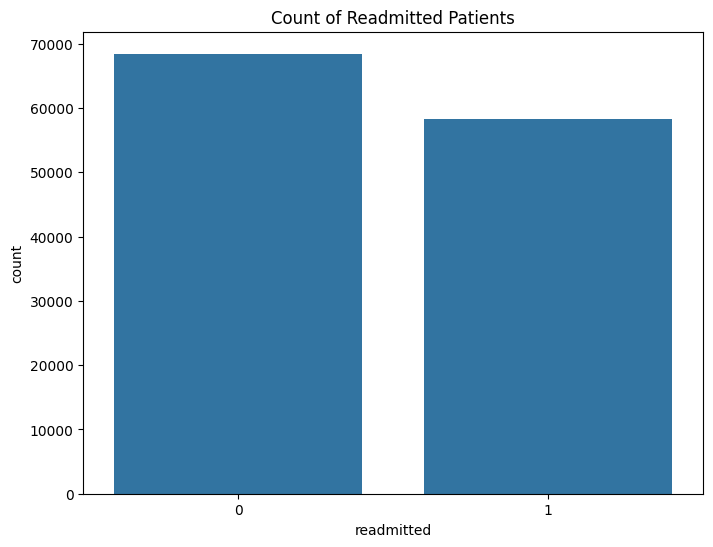

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=df)
plt.title('Count of Readmitted Patients')

# FEATURE ENGINEERING



In [ ]:

df['total_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [ ]:

df['total_procedures'] = df['num_procedures'] + df['num_lab_procedures']


In [ ]:
df['total_visits']

,total_visits
0,0
1,1
2,3
3,0
4,1
...,...
126761,0
126762,1
126763,1
126764,1


#MODEL BUILDING

In [ ]:

df.to_csv('final_data.csv', index=False)

In [ ]:
import pandas as pd

In [ ]:
final_data = pd.read_csv('final_data.csv')

In [ ]:
df = final_data

In [ ]:
df['age'] = pd.Categorical(df['age'], ordered=True)
df['race'] = pd.Categorical(df['race'], ordered=False)
df['gender'] = pd.Categorical(df['gender'], ordered=False)
df['medical_specialty'] = pd.Categorical(df['medical_specialty'], ordered=False)
df['payer_code'] = pd.Categorical(df['payer_code'], ordered=False)
df['readmitted'] = pd.Categorical(df['readmitted'], ordered=False)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['readmitted'])
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)

X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_encoded, y_train)

y_pred_lr = lr_model.predict(X_test_encoded)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

y_pred_rf = rf_model.predict(X_test_encoded)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6188
              precision    recall  f1-score   support

           0       0.62      0.79      0.69     13743
           1       0.63      0.41      0.50     11611

    accuracy                           0.62     25354
   macro avg       0.62      0.60      0.60     25354
weighted avg       0.62      0.62      0.60     25354

Random Forest Accuracy: 0.6635
              precision    recall  f1-score   support

           0       0.67      0.76      0.71     13743
           1       0.66      0.55      0.60     11611

    accuracy                           0.66     25354
   macro avg       0.66      0.65      0.65     25354
weighted avg       0.66      0.66      0.66     25354



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

selector = RFE(RandomForestClassifier(), n_features_to_select=15, step=1)
selector = selector.fit(X_train_encoded, y_train)
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

In [ ]:
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_selected)
y_prob_rf = rf_model.predict_proba(X_test_selected)[:, 1]


from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest AUC-ROC: {auc_rf:.4f}")

print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

Random Forest Accuracy: 0.7183
Random Forest AUC-ROC: 0.8027
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     13743
           1       0.71      0.64      0.68     11611

    accuracy                           0.72     25354
   macro avg       0.72      0.71      0.71     25354
weighted avg       0.72      0.72      0.72     25354

Confusion Matrix:
[[10727  3016]
 [ 4127  7484]]


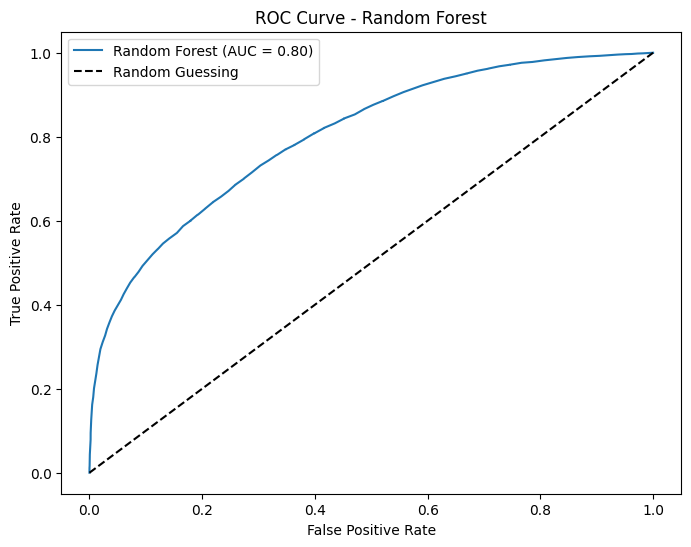

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_rf = rf_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='best')
plt.show()


In [ ]:
import joblib

joblib.dump(rf_model, 'random_forest_model2.pkl')


['random_forest_model2.pkl']

In [ ]:
selected_features = X_train_encoded.columns[selector.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_inpatient', 'number_diagnoses', 'metformin',
       'insulin', 'total_visits', 'total_procedures', 'race_Caucasian',
       'gender_1', 'age_[60-70)', 'age_[70-80)', 'payer_code_MC'],
      dtype='object')


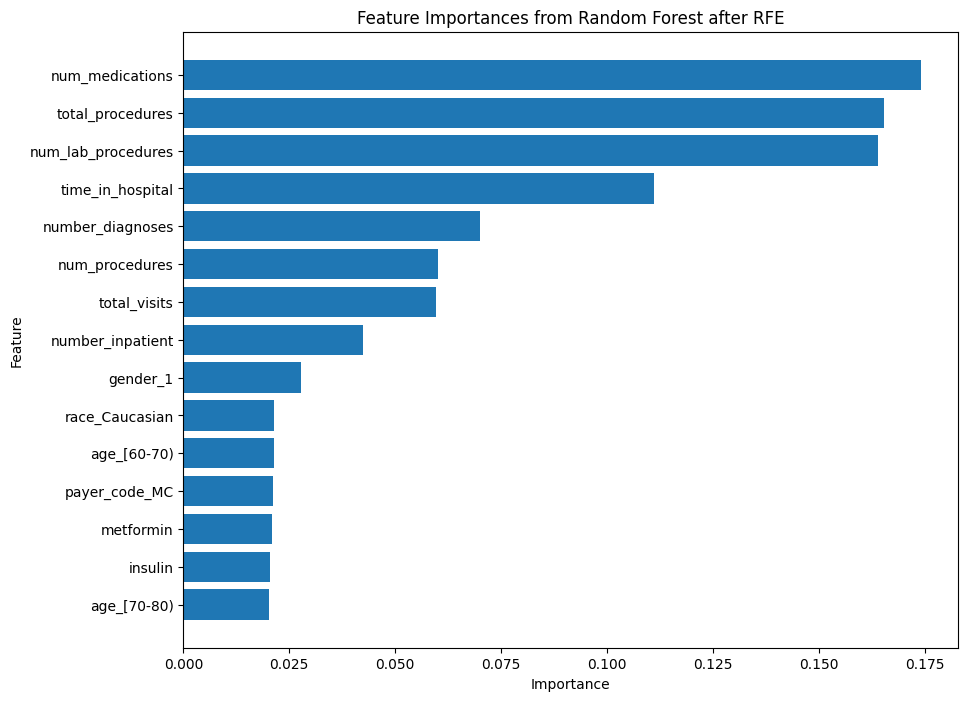

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf_model.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest after RFE')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
y_train_pred = rf_model.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, rf_model.predict_proba(X_train_selected)[:, 1])

y_test_pred = rf_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_selected)[:, 1])

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training AUC-ROC: {train_auc:.4f}")
print(f"Test AUC-ROC: {test_auc:.4f}")


Training Accuracy: 0.9987
Test Accuracy: 0.7183
Training AUC-ROC: 1.0000
Test AUC-ROC: 0.8027


In [ ]:
importances_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

top_features = importances_df.nlargest(3, 'Importance')['Feature'].tolist()
print(top_features)

['num_medications', 'total_procedures', 'num_lab_procedures']


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np

Selected Features: Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_inpatient', 'number_diagnoses', 'metformin',
       'insulin', 'total_visits', 'total_procedures', 'race_Caucasian',
       'gender_1', 'age_[60-70)', 'age_[70-80)', 'payer_code_MC'],
      dtype='object')
Columns of X_train_selected: Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_inpatient', 'number_diagnoses', 'metformin',
       'insulin', 'total_visits', 'total_procedures', 'race_Caucasian',
       'gender_1', 'age_[60-70)', 'age_[70-80)', 'payer_code_MC'],
      dtype='object')


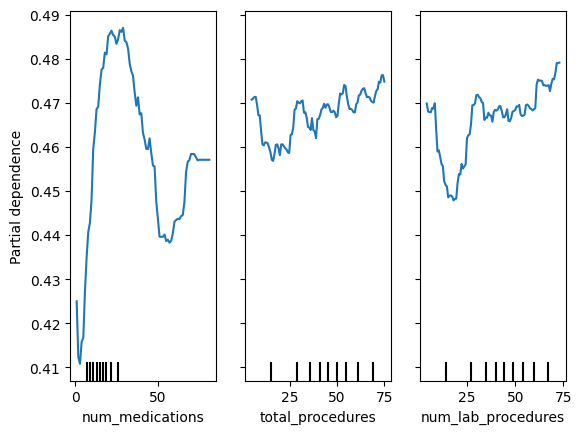

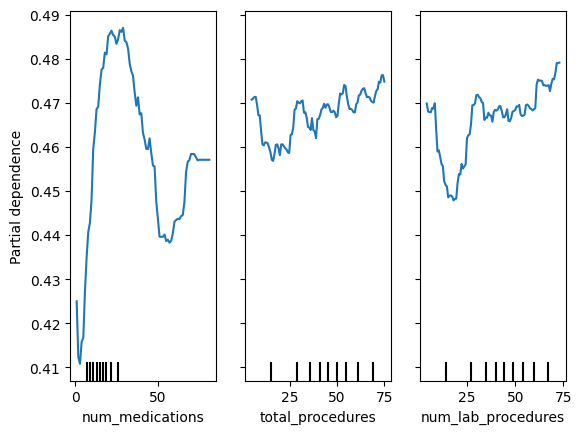

In [ ]:
print("Selected Features:", selected_features)

if isinstance(X_train_selected, np.ndarray):
    X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)

print("Columns of X_train_selected:", X_train_selected.columns)

from sklearn.inspection import PartialDependenceDisplay

display = PartialDependenceDisplay.from_estimator(rf_model, X_train_selected, features=top_features)
display.plot()

In [ ]:
import joblib
rf_model = joblib.load('random_forest_model2.pkl')

In [ ]:
selected_features = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_inpatient', 'number_diagnoses', 'metformin',
    'insulin', 'total_visits', 'total_procedures', 'race_Caucasian',
    'gender_1', 'age_[60-70)', 'age_[70-80)', 'payer_code_MC'
]


In [ ]:
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

In [ ]:
%pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import shap

subset_size = 300
X_test_subset = X_test_selected.sample(subset_size, random_state=42)

explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test_subset)

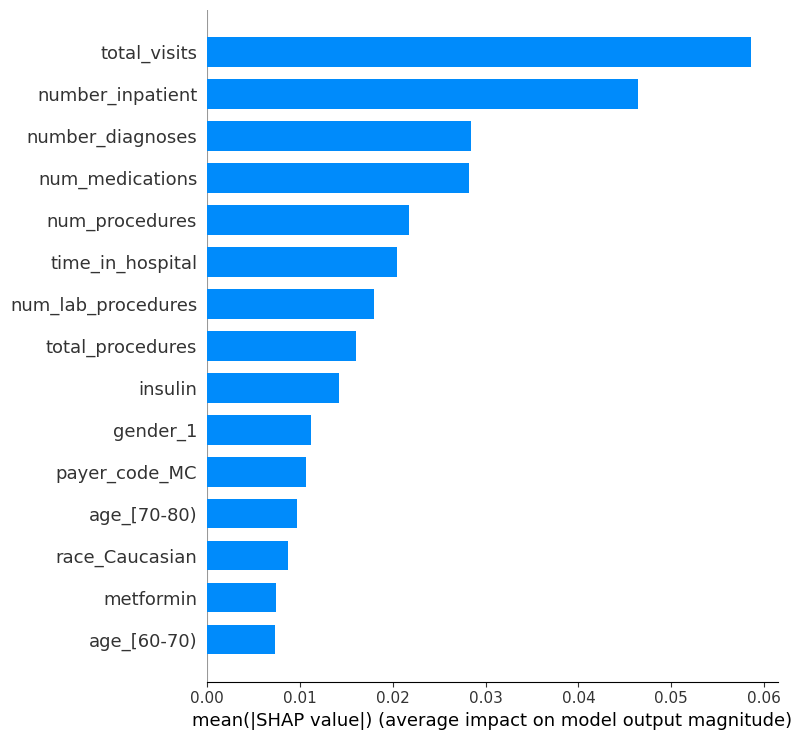

In [ ]:
shap.summary_plot(shap_values[:,:,0], X_test_subset, plot_type="bar")

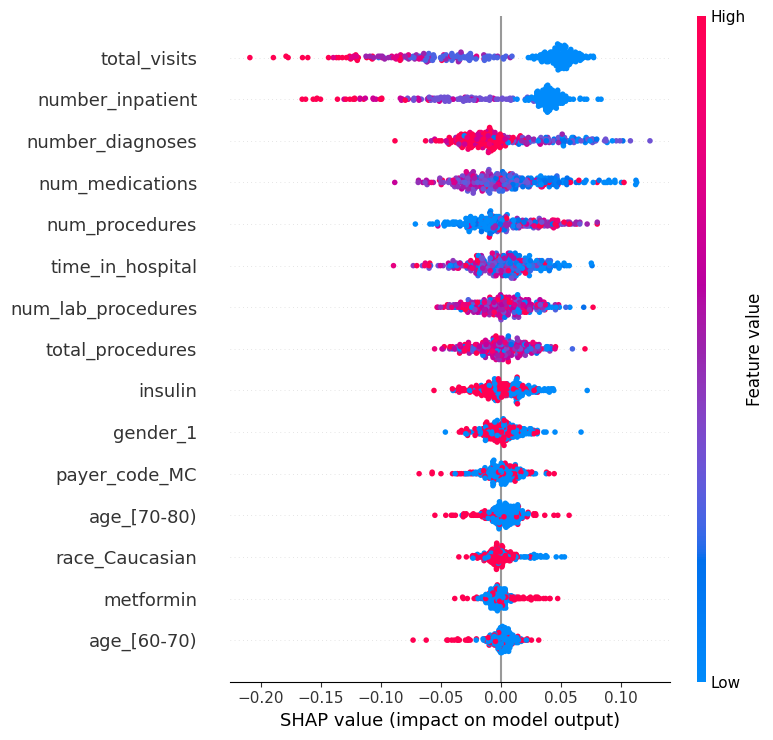

In [ ]:
shap.summary_plot(shap_values[:,:,0], X_test_subset)

In [ ]:
shap.initjs()

In [ ]:
shap.initjs()


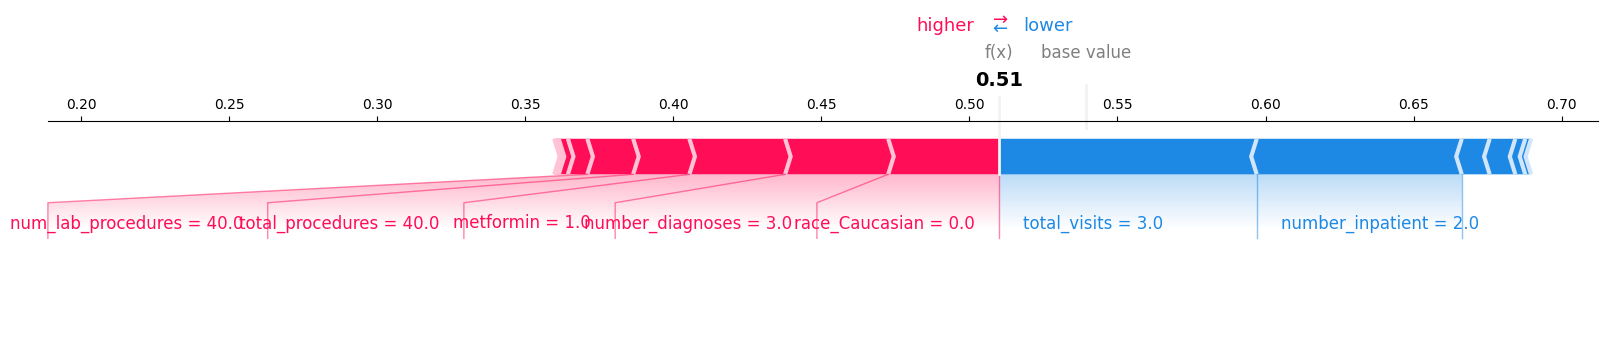

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0,:,0], X_test_subset.iloc[0,:], matplotlib=True)

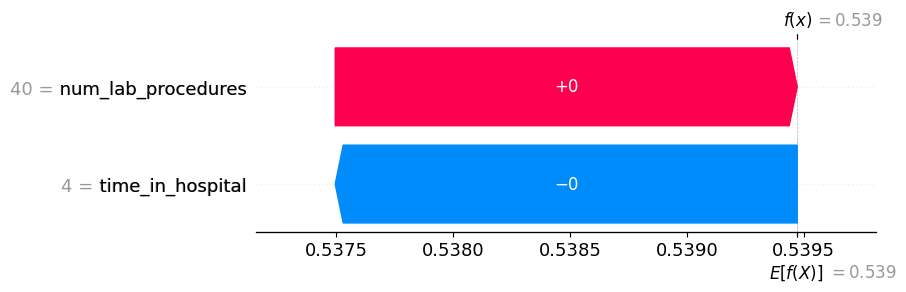

In [ ]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0][0], base_values=explainer.expected_value[0], data=X_test_subset.iloc[0]))
